### Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

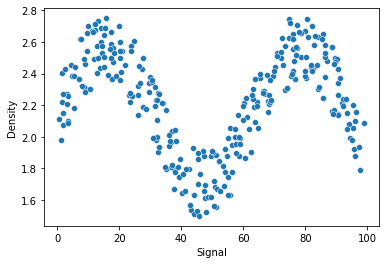

In [7]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [10]:
X = df['Signal'].values.reshape(-1,1) # becouse we just have a single feature
y = df['Density']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_model = LinearRegression()

In [15]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [16]:
lin_preds = lin_model.predict(X_test)

In [17]:
lin_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
mean_absolute_error(y_test,lin_preds)

0.211198973318633

In [20]:
np.sqrt(mean_squared_error(y_test,lin_preds))

0.2570051996584629

In [22]:
signal_range = np.arange(0,100)

In [23]:
signal_preds = lin_model.predict(signal_range.reshape(-1,1))

In [24]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

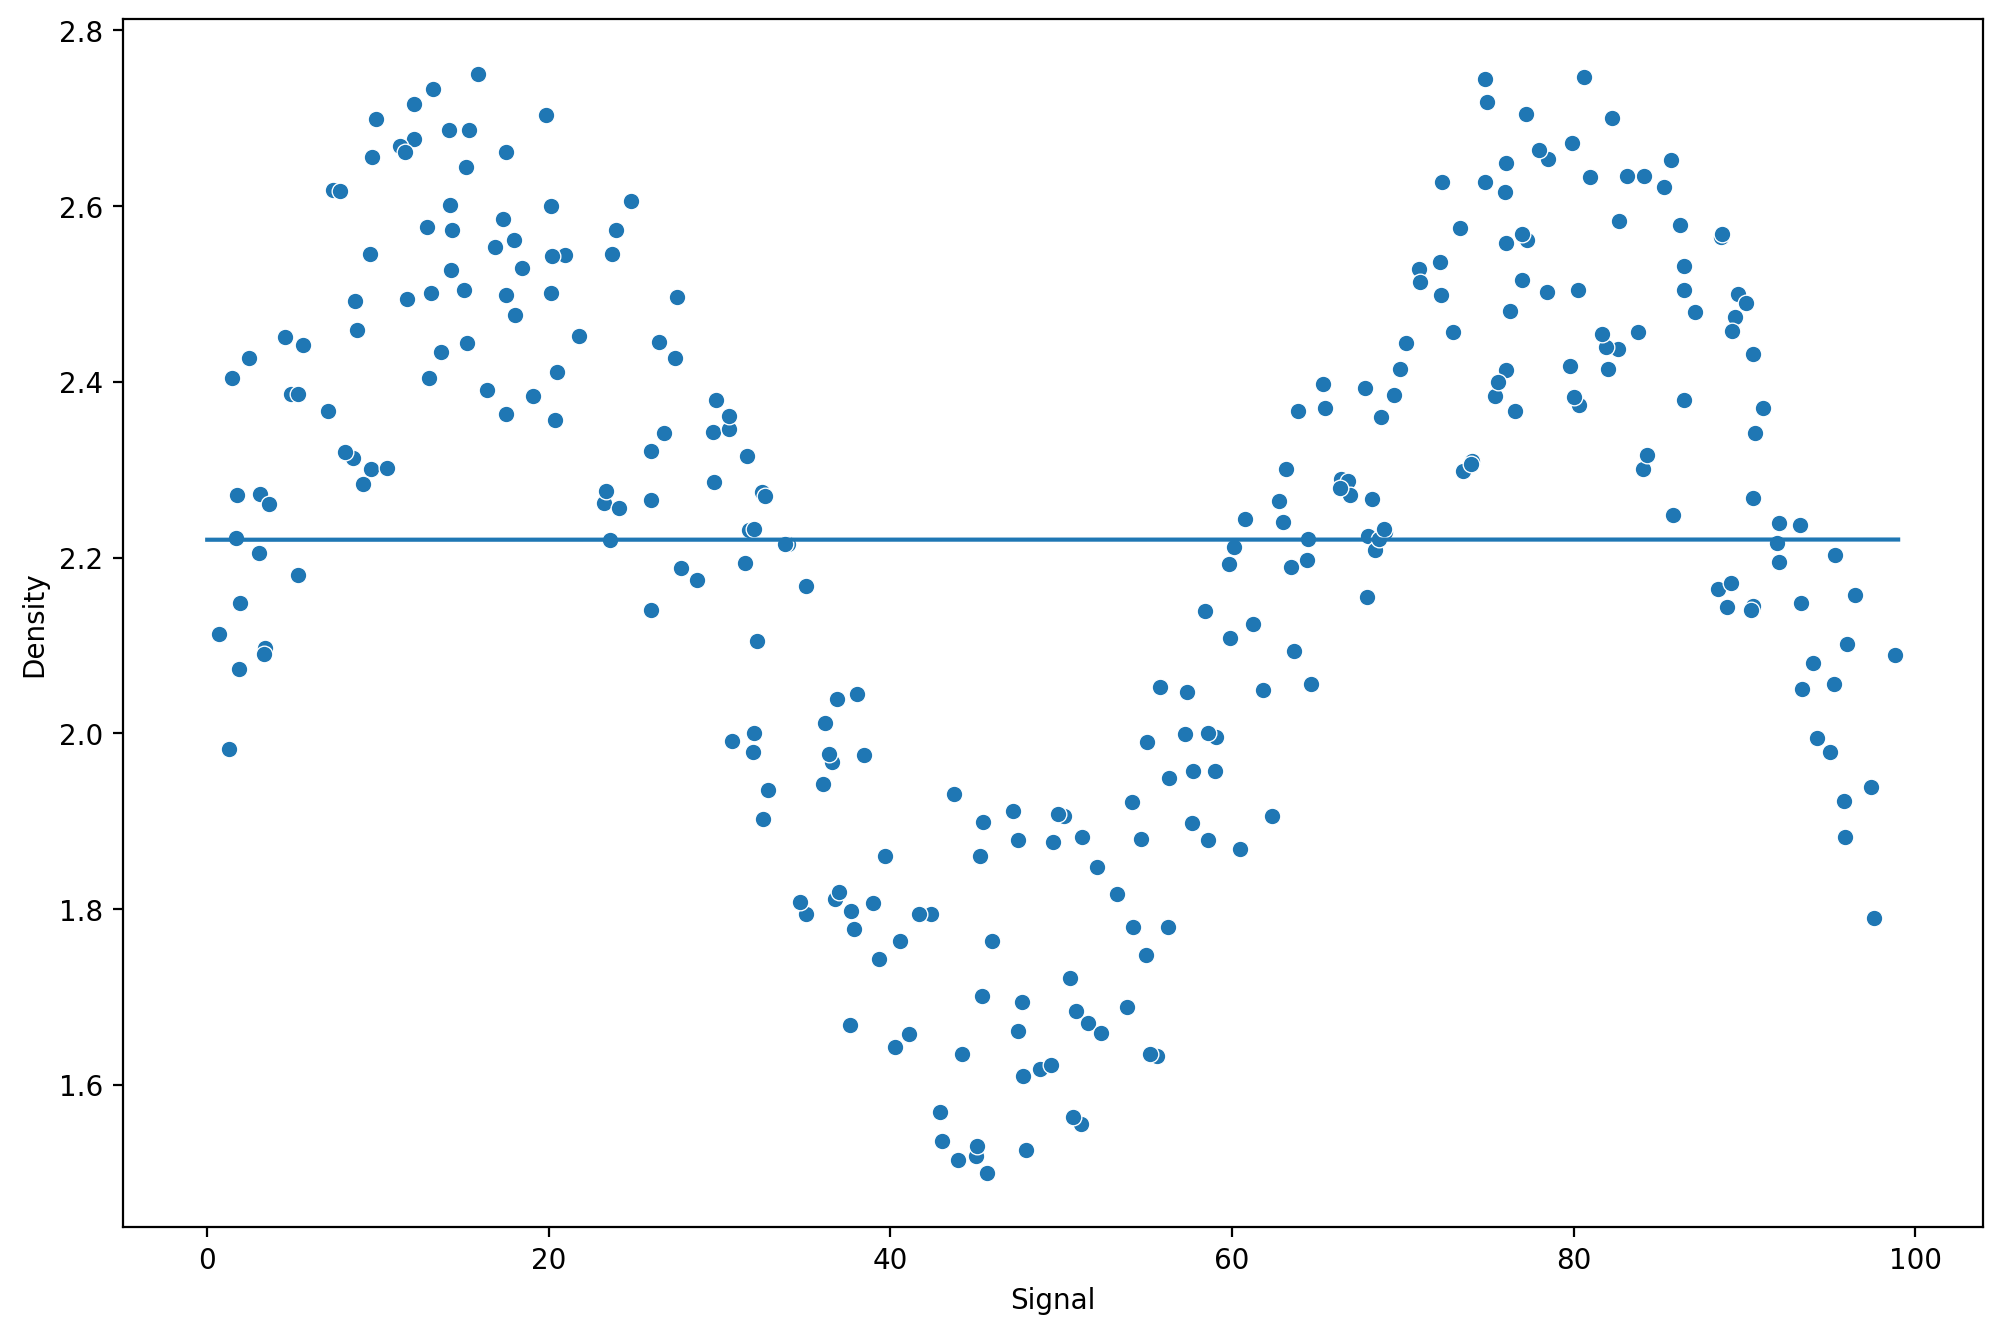

In [25]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

In [26]:
y_test

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
281    1.789537
226    2.263986
284    2.148269
147    2.496735
228    2.442191
235    1.897325
123    1.923440
221    2.266713
270    2.192791
78     2.415050
89     2.661302
4      2.452374
143    2.656490
19     2.343174
259    2.360571
200    2.261214
41     2.038879
208    2.543720
15     2.545491
153    2.300750
285    2.359919
169    1.999187
265    1.658609
13     2.431704
212    2.300320
Name: Density, dtype: float64

### Polynomial Regression

In [27]:
# we create a function
def run_model(model,X_train,y_train,X_test,y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train,y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE : {mae}')
    print(f'RMSE : {rmse}')
    
    # PLOT RESULT MODEL SIGNAL RANGE
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')

    plt.plot(signal_range,signal_preds)

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [31]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE : 0.11969085253552043
RMSE : 0.13807383449323551


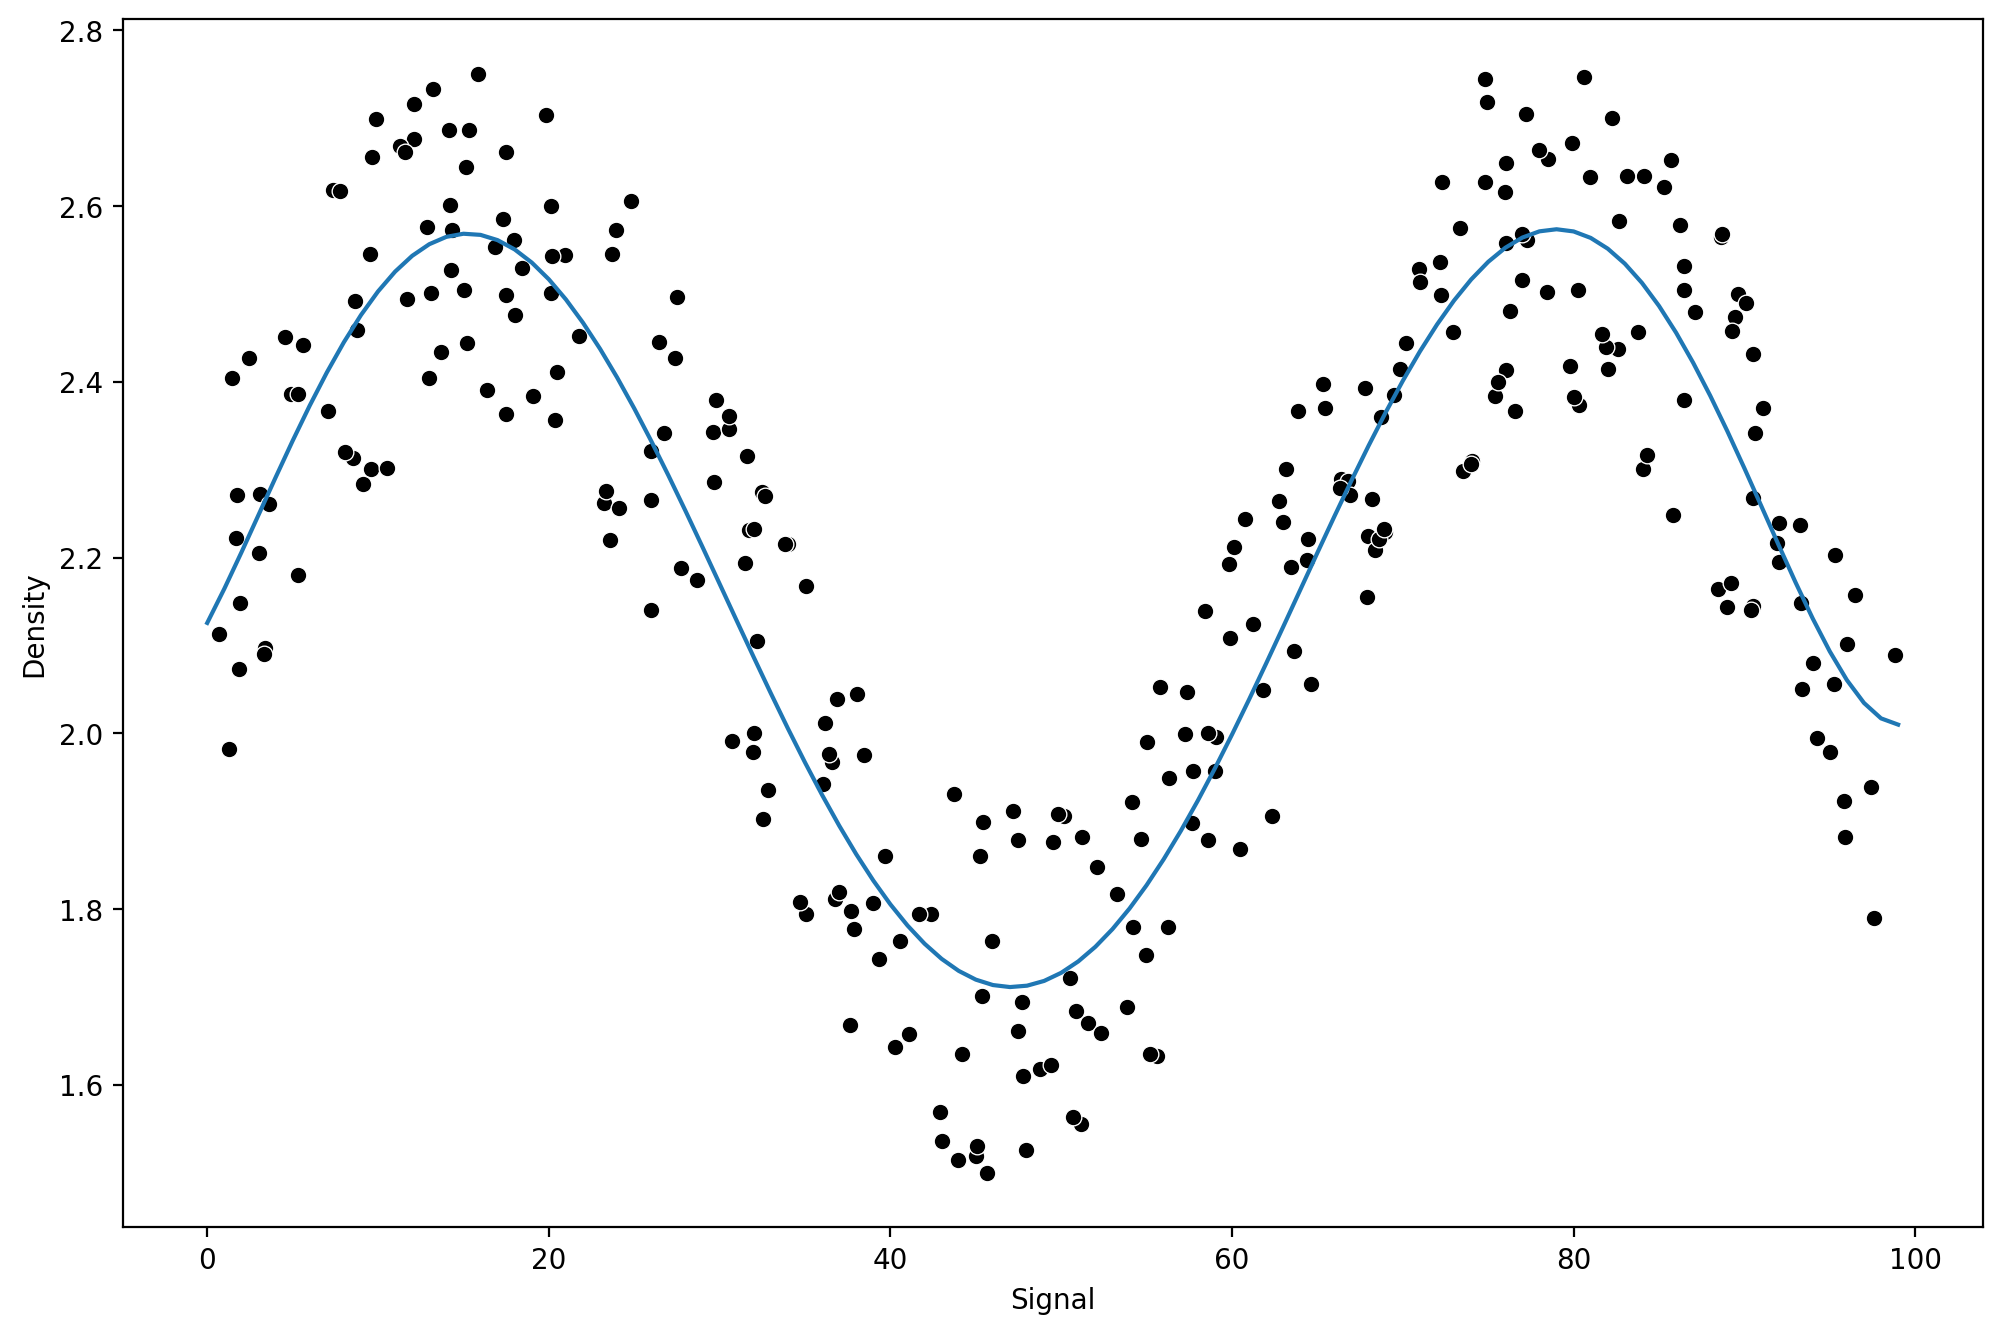

In [32]:
run_model(pipe,X_train,y_train,X_test,y_test)

### Advanced Models

In [33]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378
RMSE : 0.1523487028635337
MAE : 0.12198383614100558
RMSE : 0.13730685016923647
MAE : 0.11635971693292672
RMSE : 0.13277855732740926
MAE : 0.13363165935705318
RMSE : 0.15954234753677107


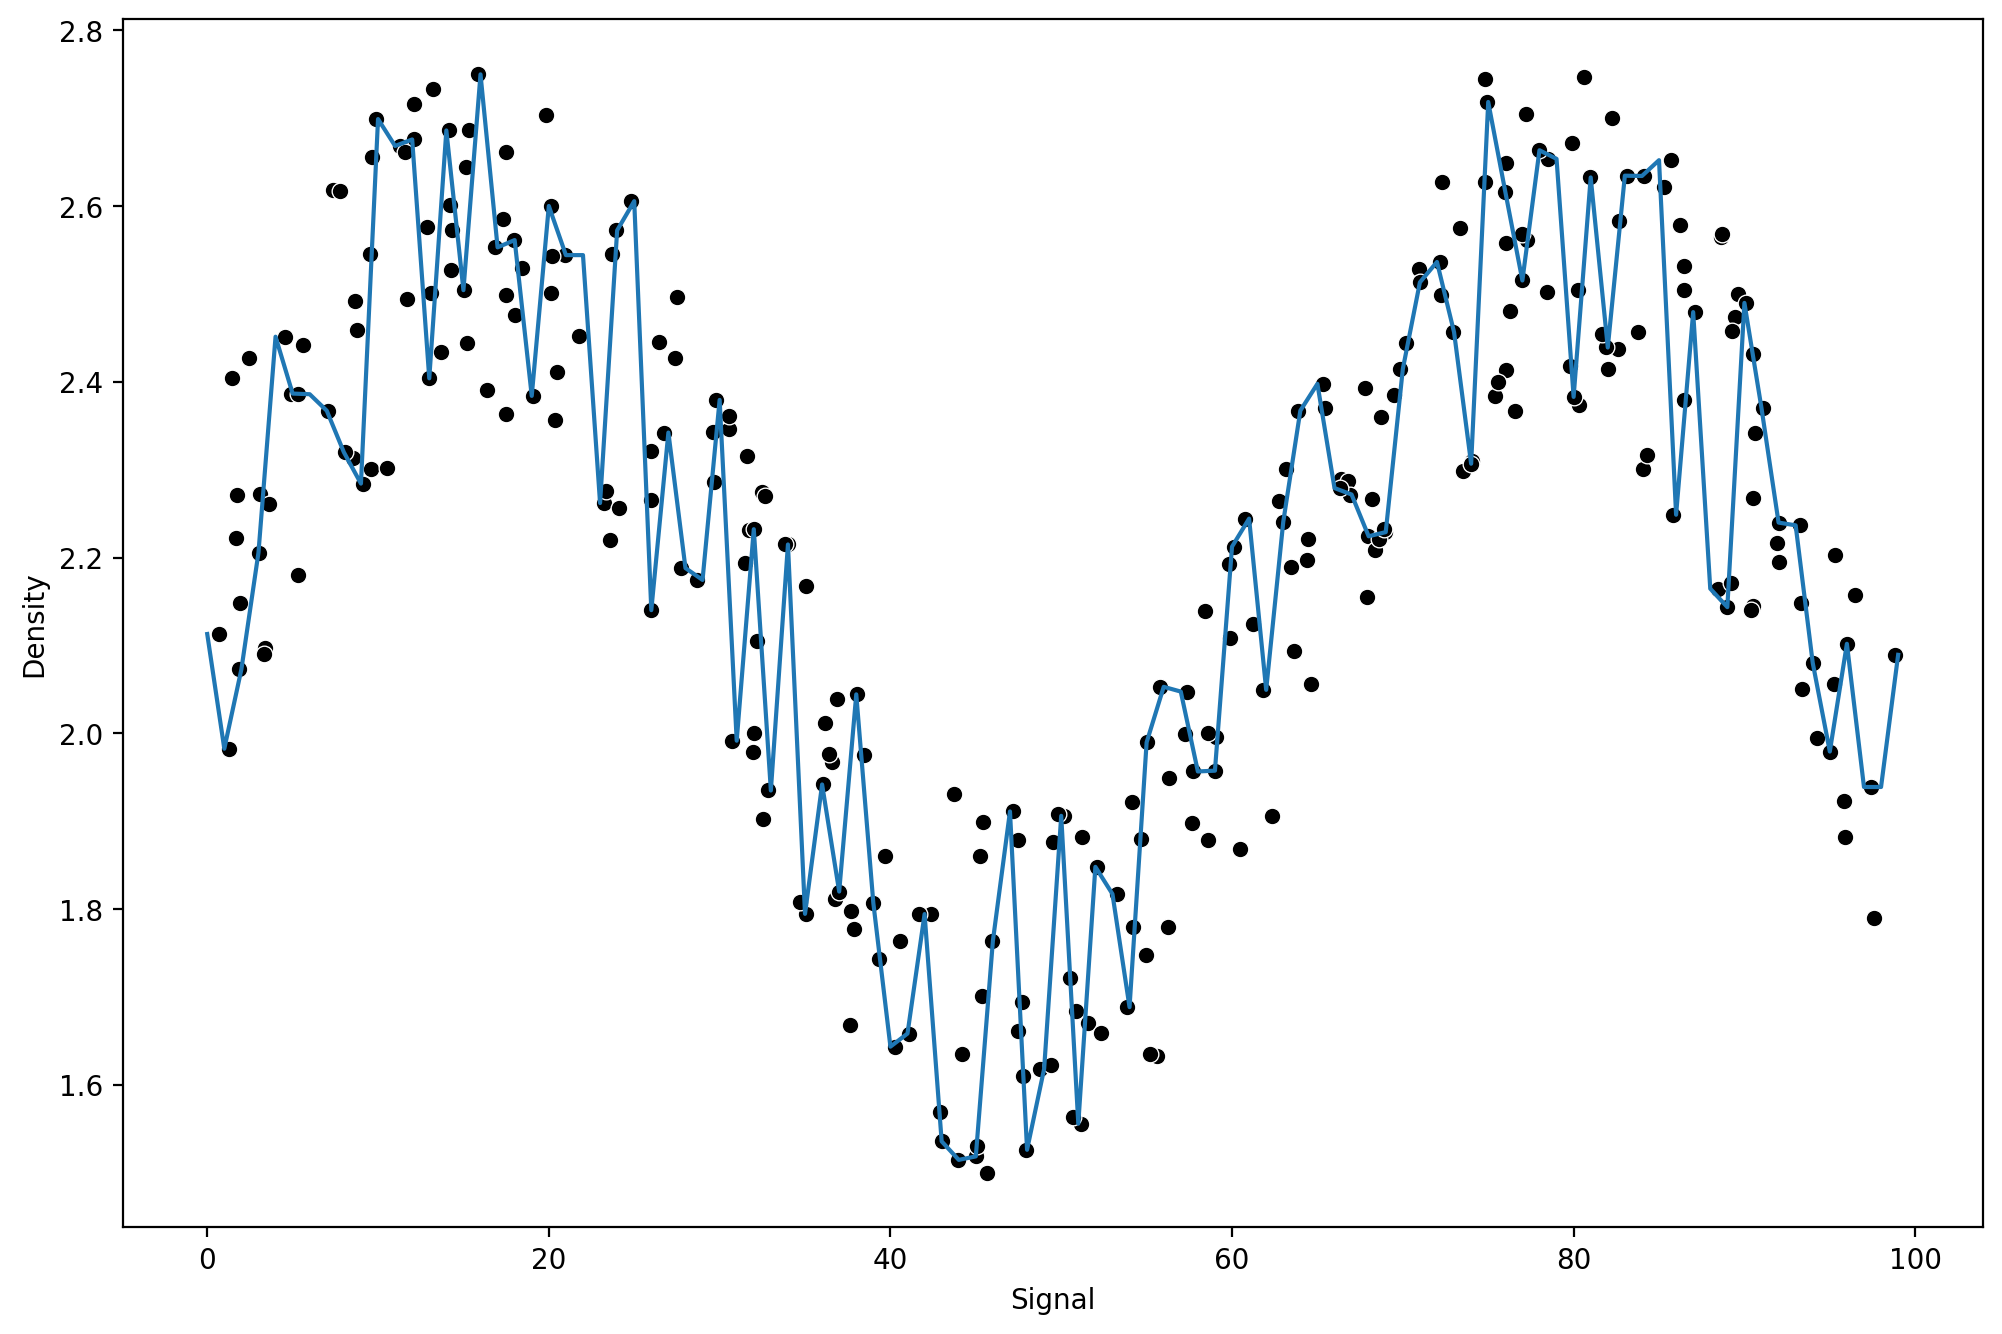

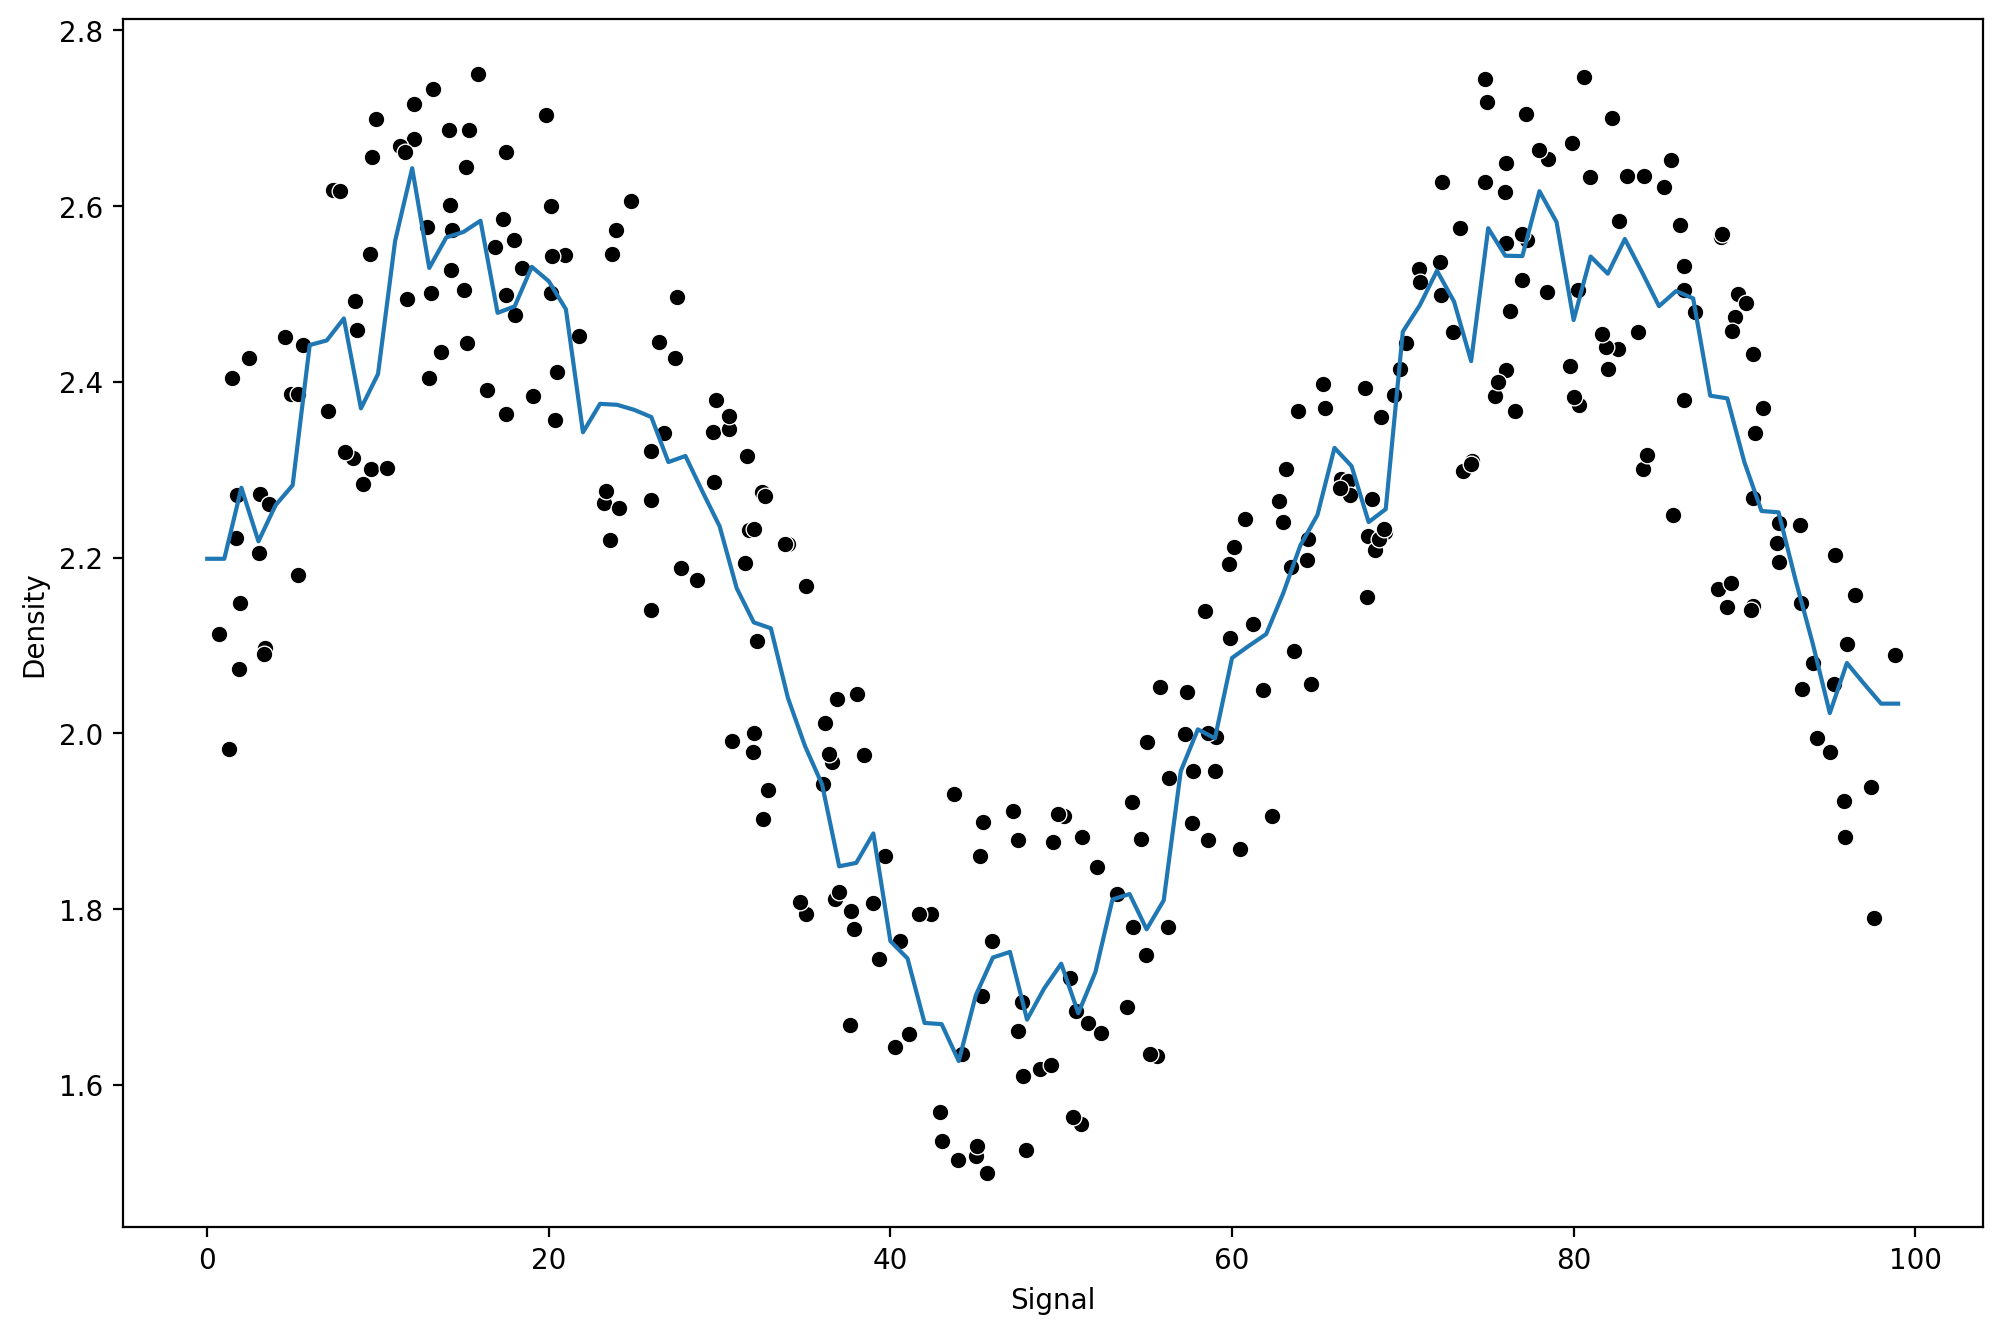

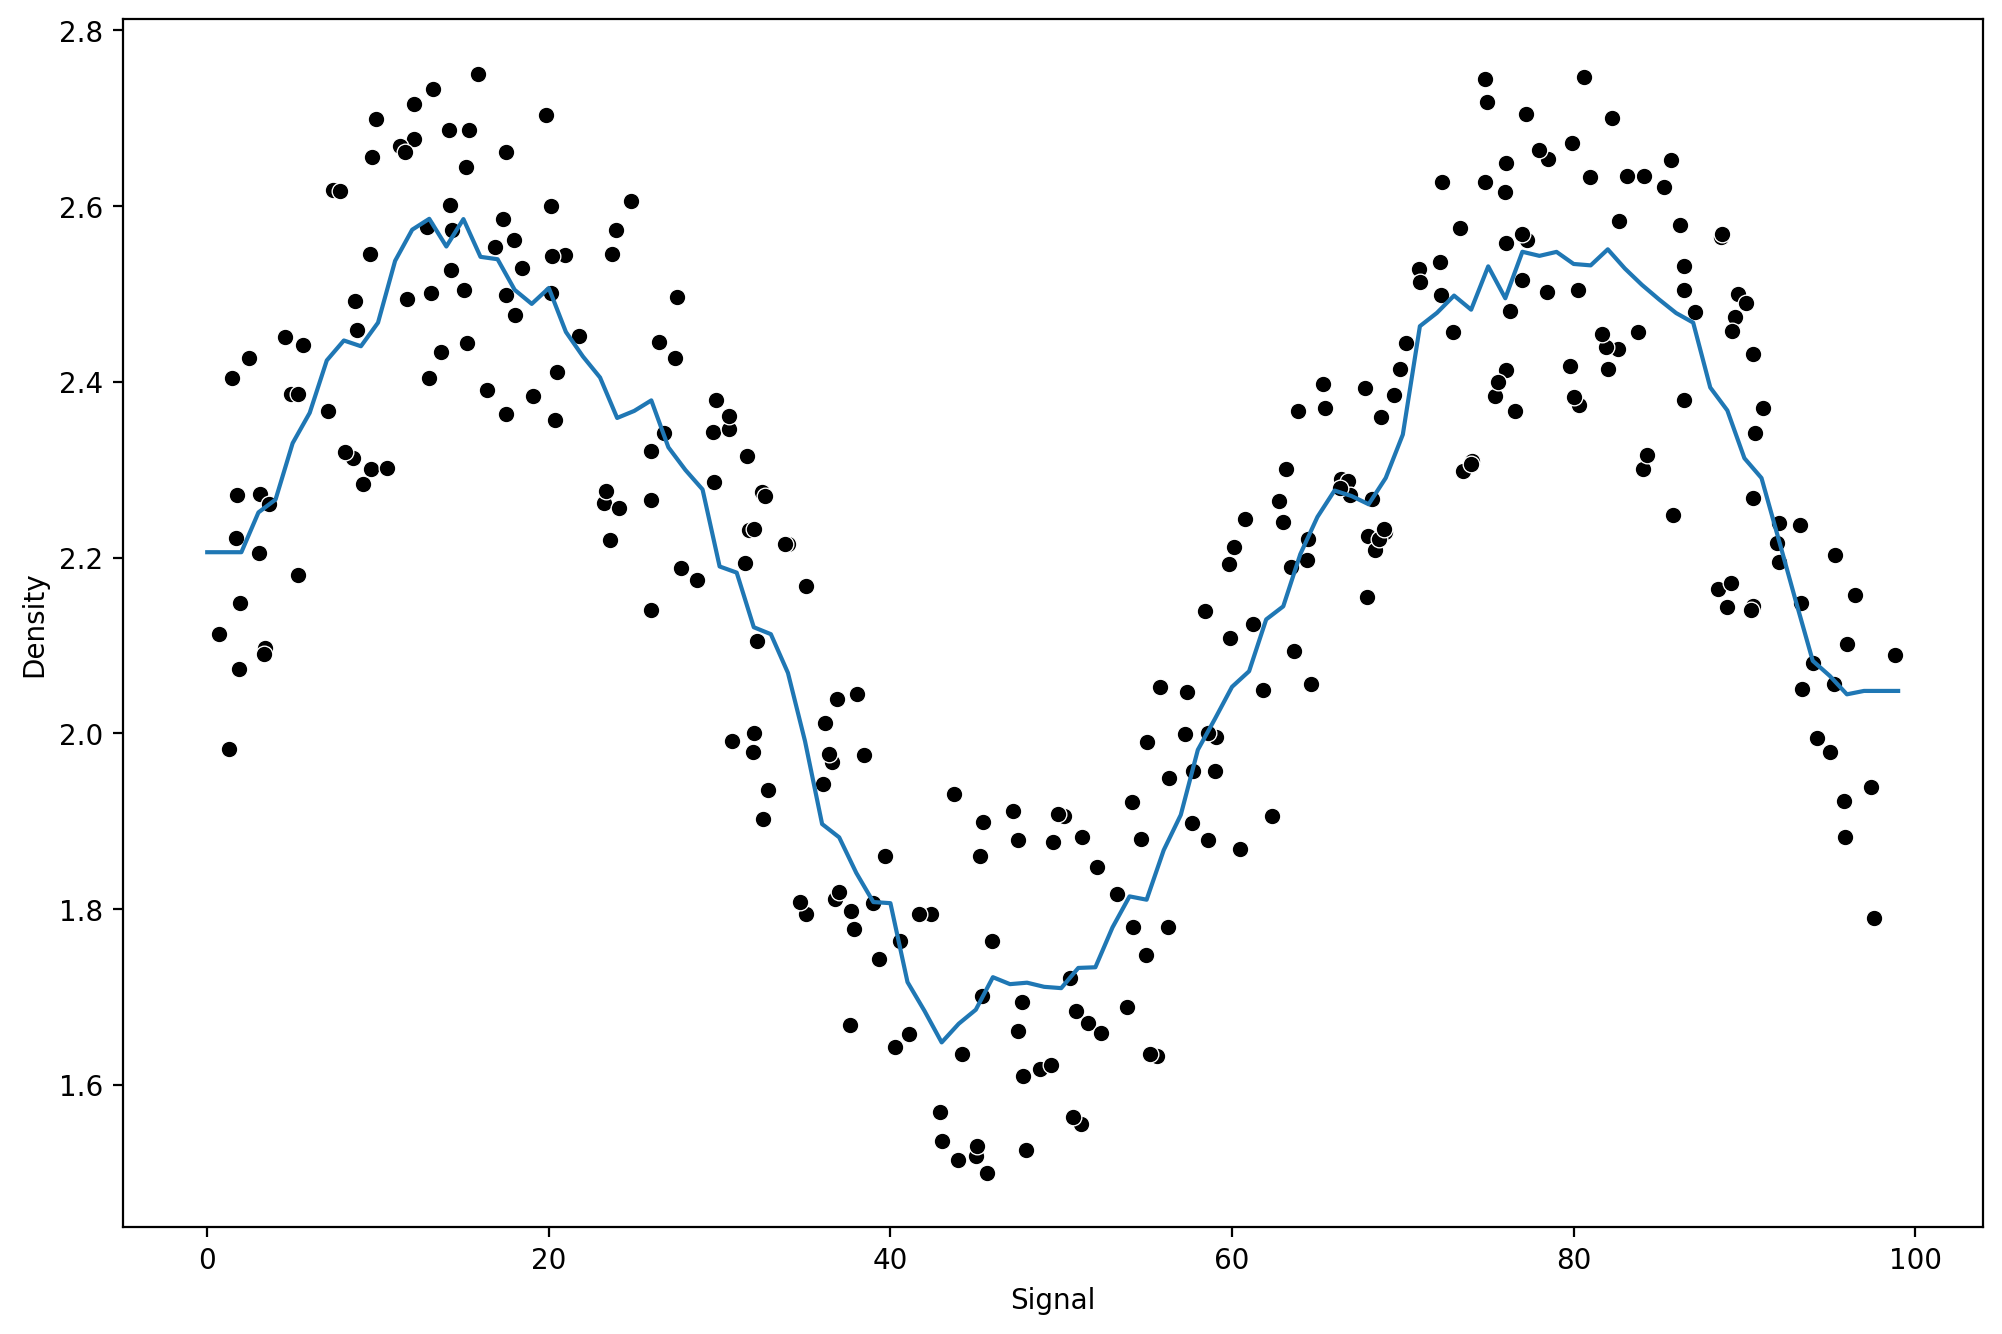

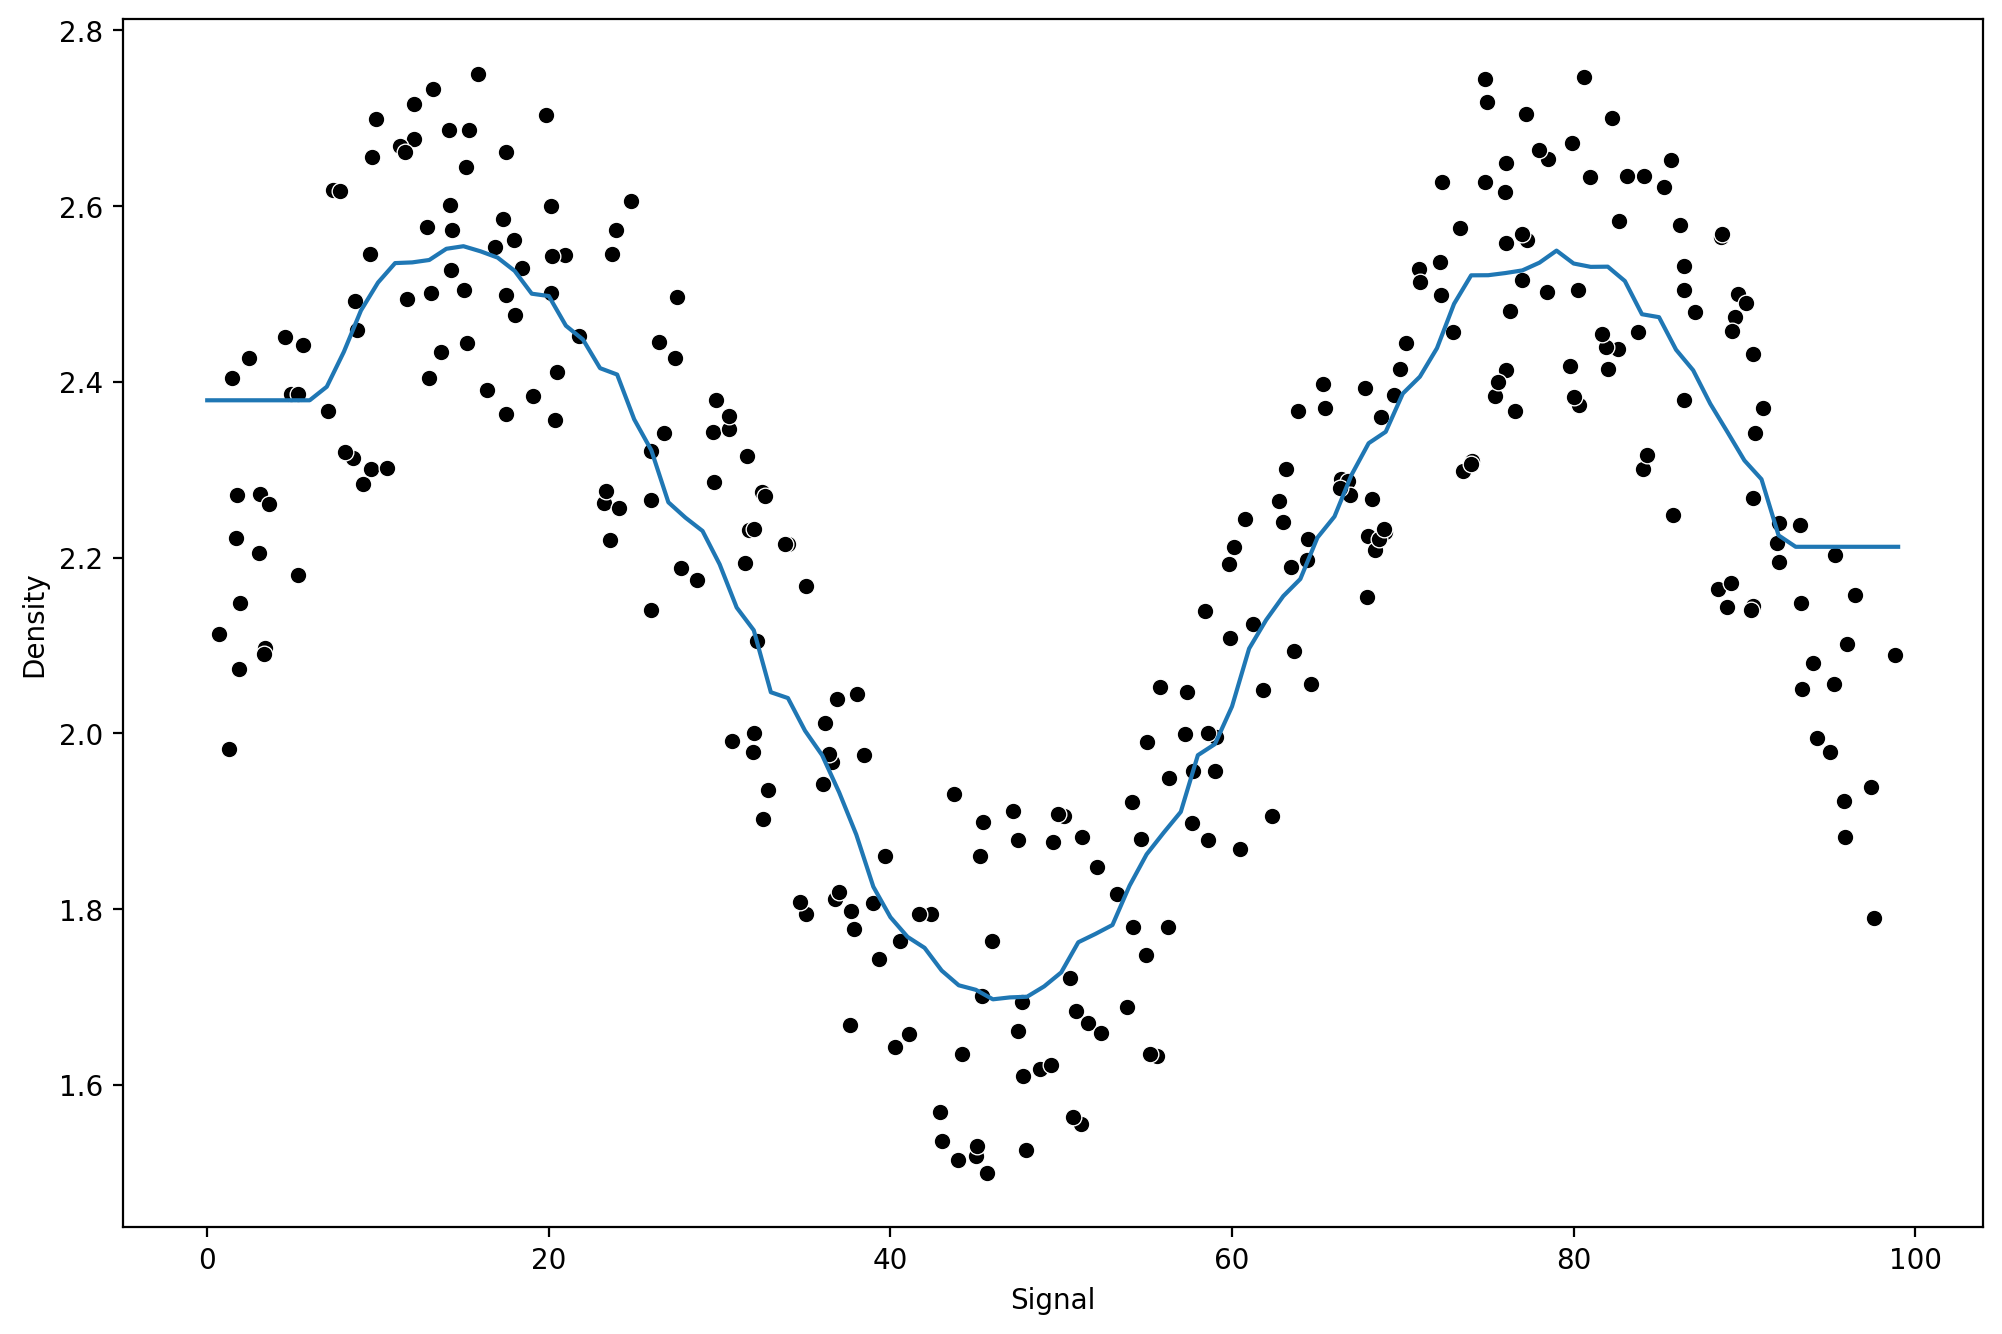

In [36]:
k_values = [1,5,10,30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [37]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378
RMSE : 0.1523487028635337


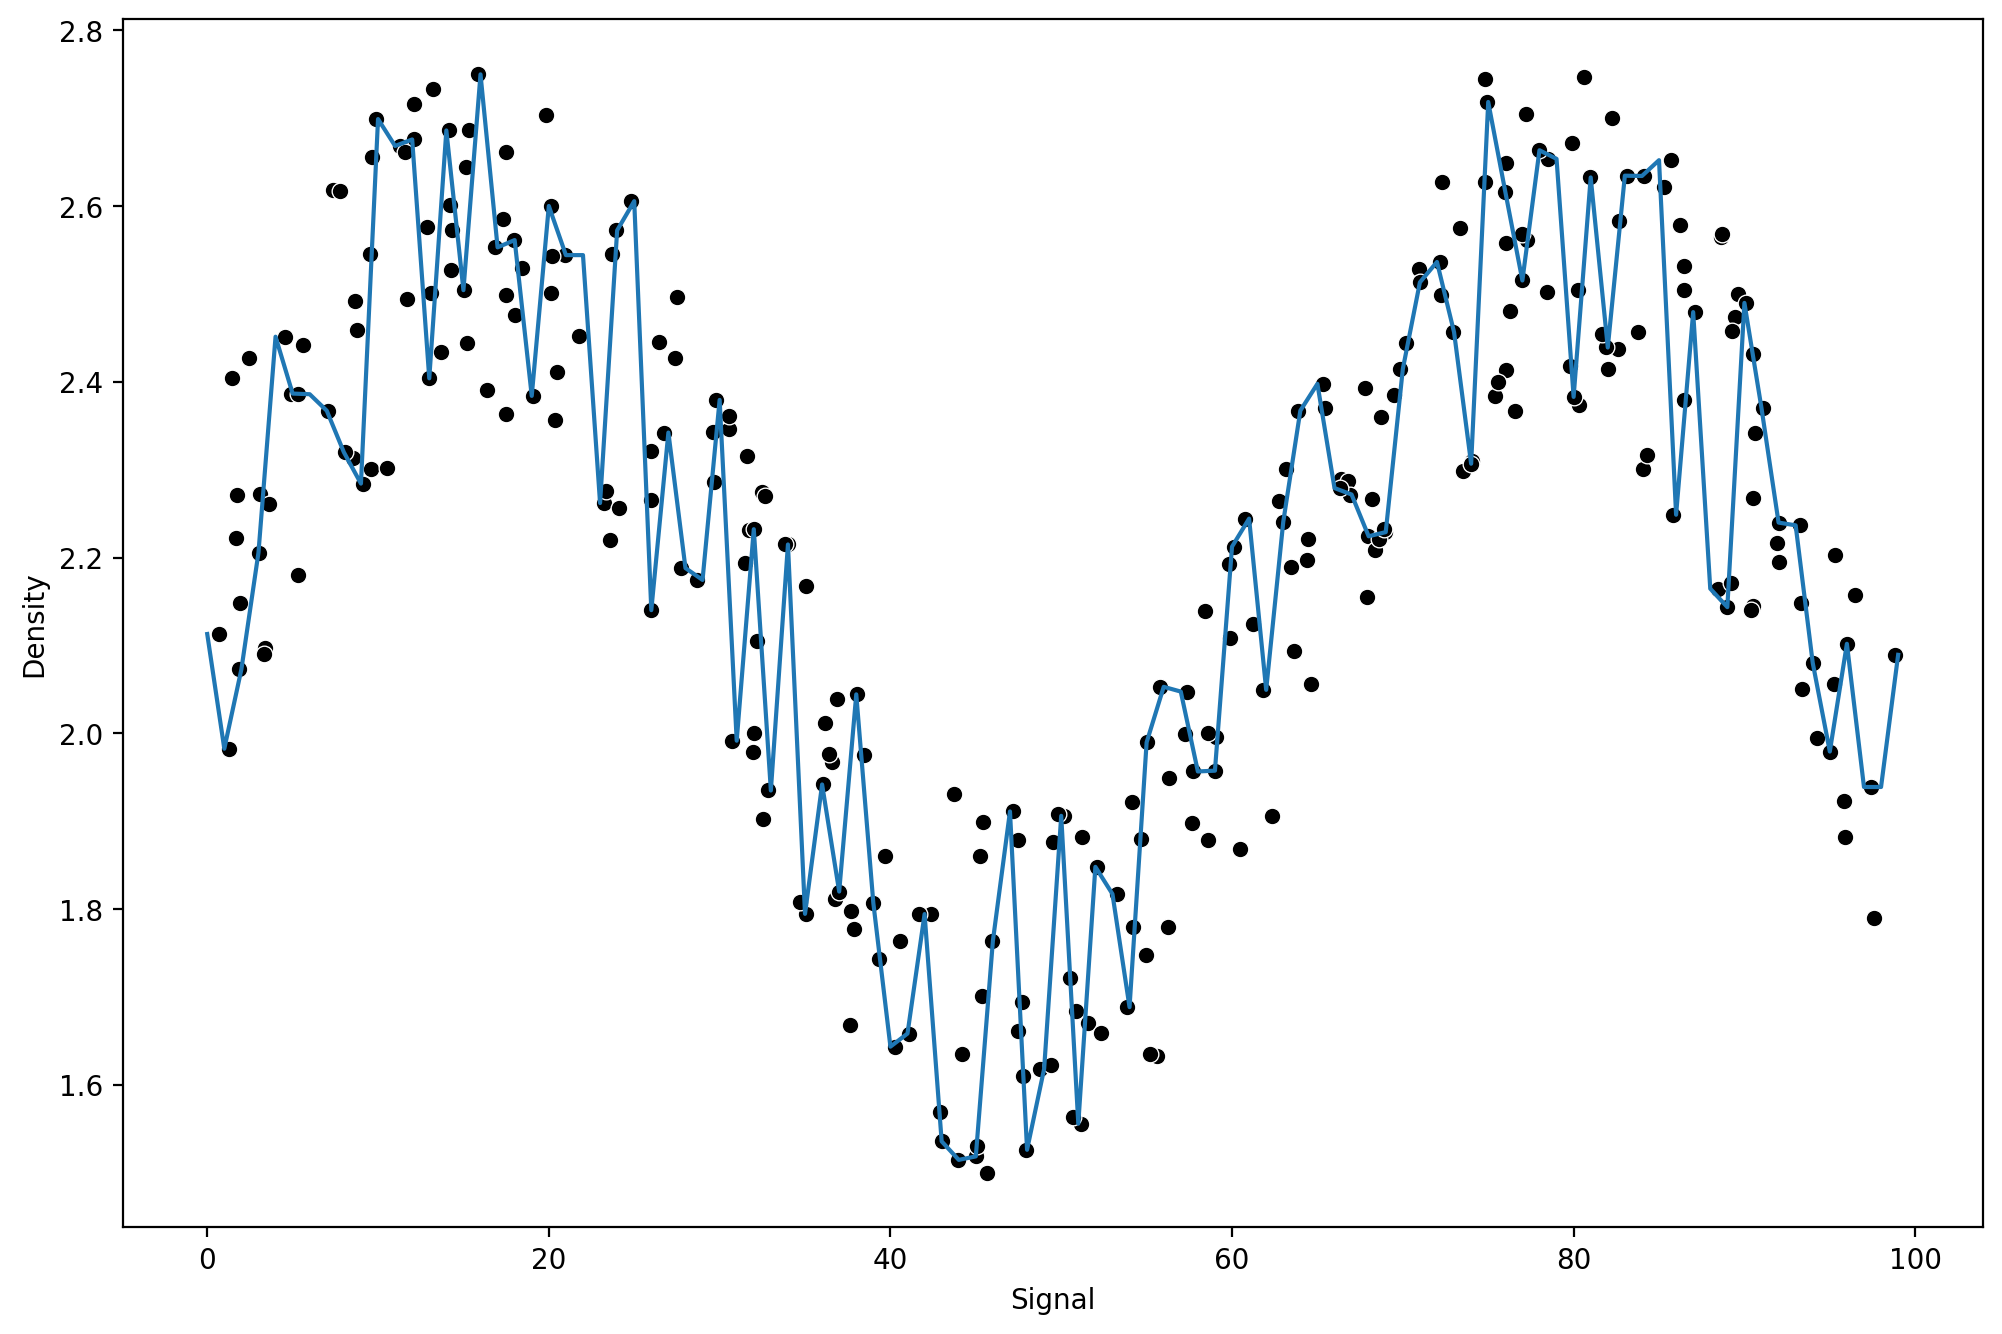

In [38]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [39]:
from sklearn.svm import SVR

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

MAE : 0.10854210121348368
RMSE : 0.12646999302046696


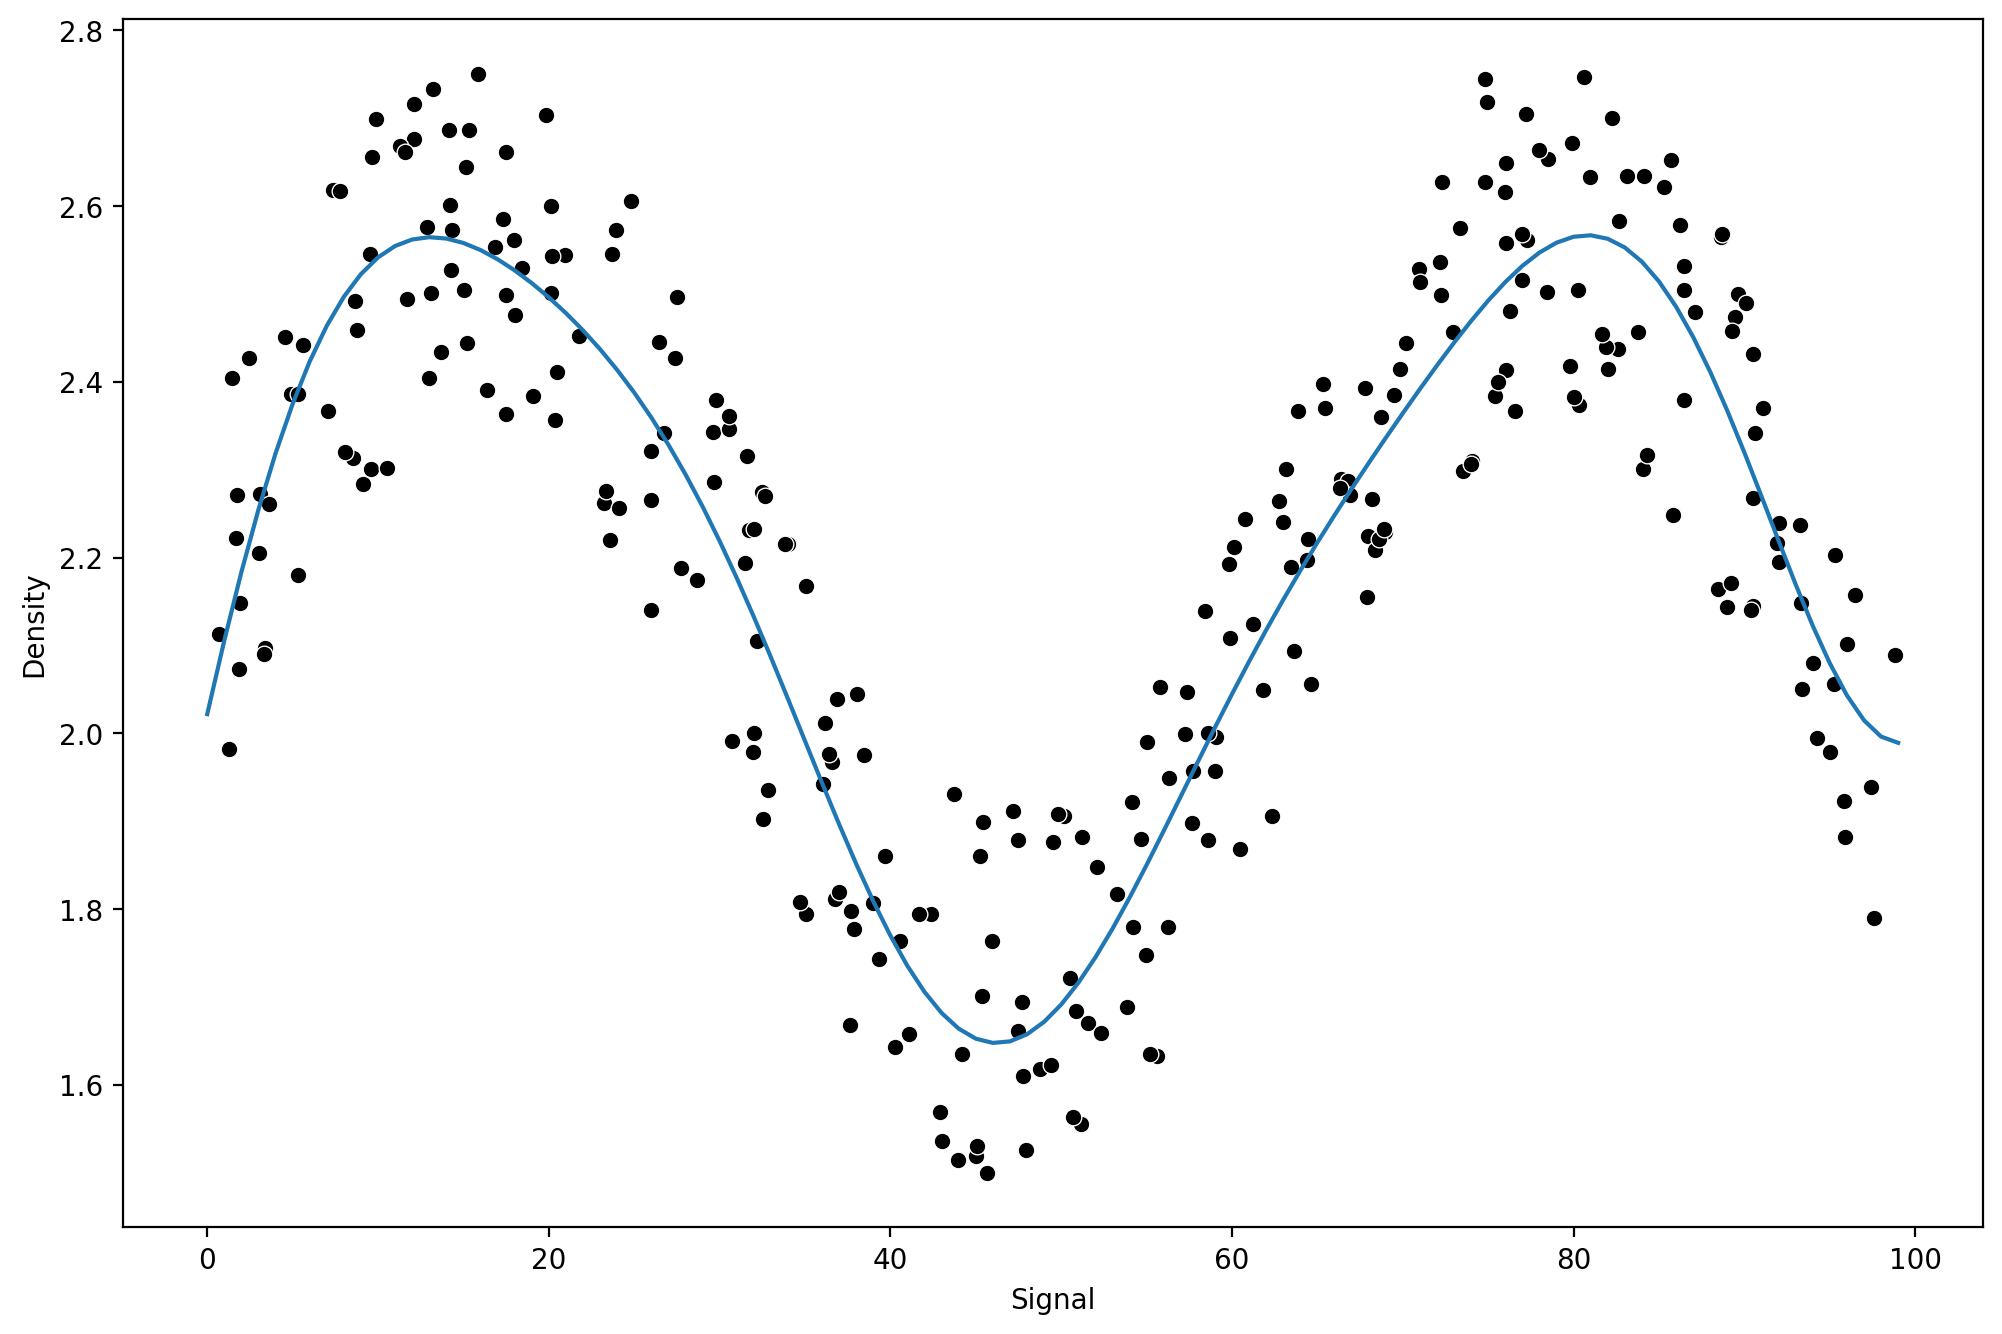

In [42]:
run_model(grid,X_train,y_train,X_test,y_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr = RandomForestRegressor(n_estimators=10)

MAE : 0.11824676759904866
RMSE : 0.1445657250948114


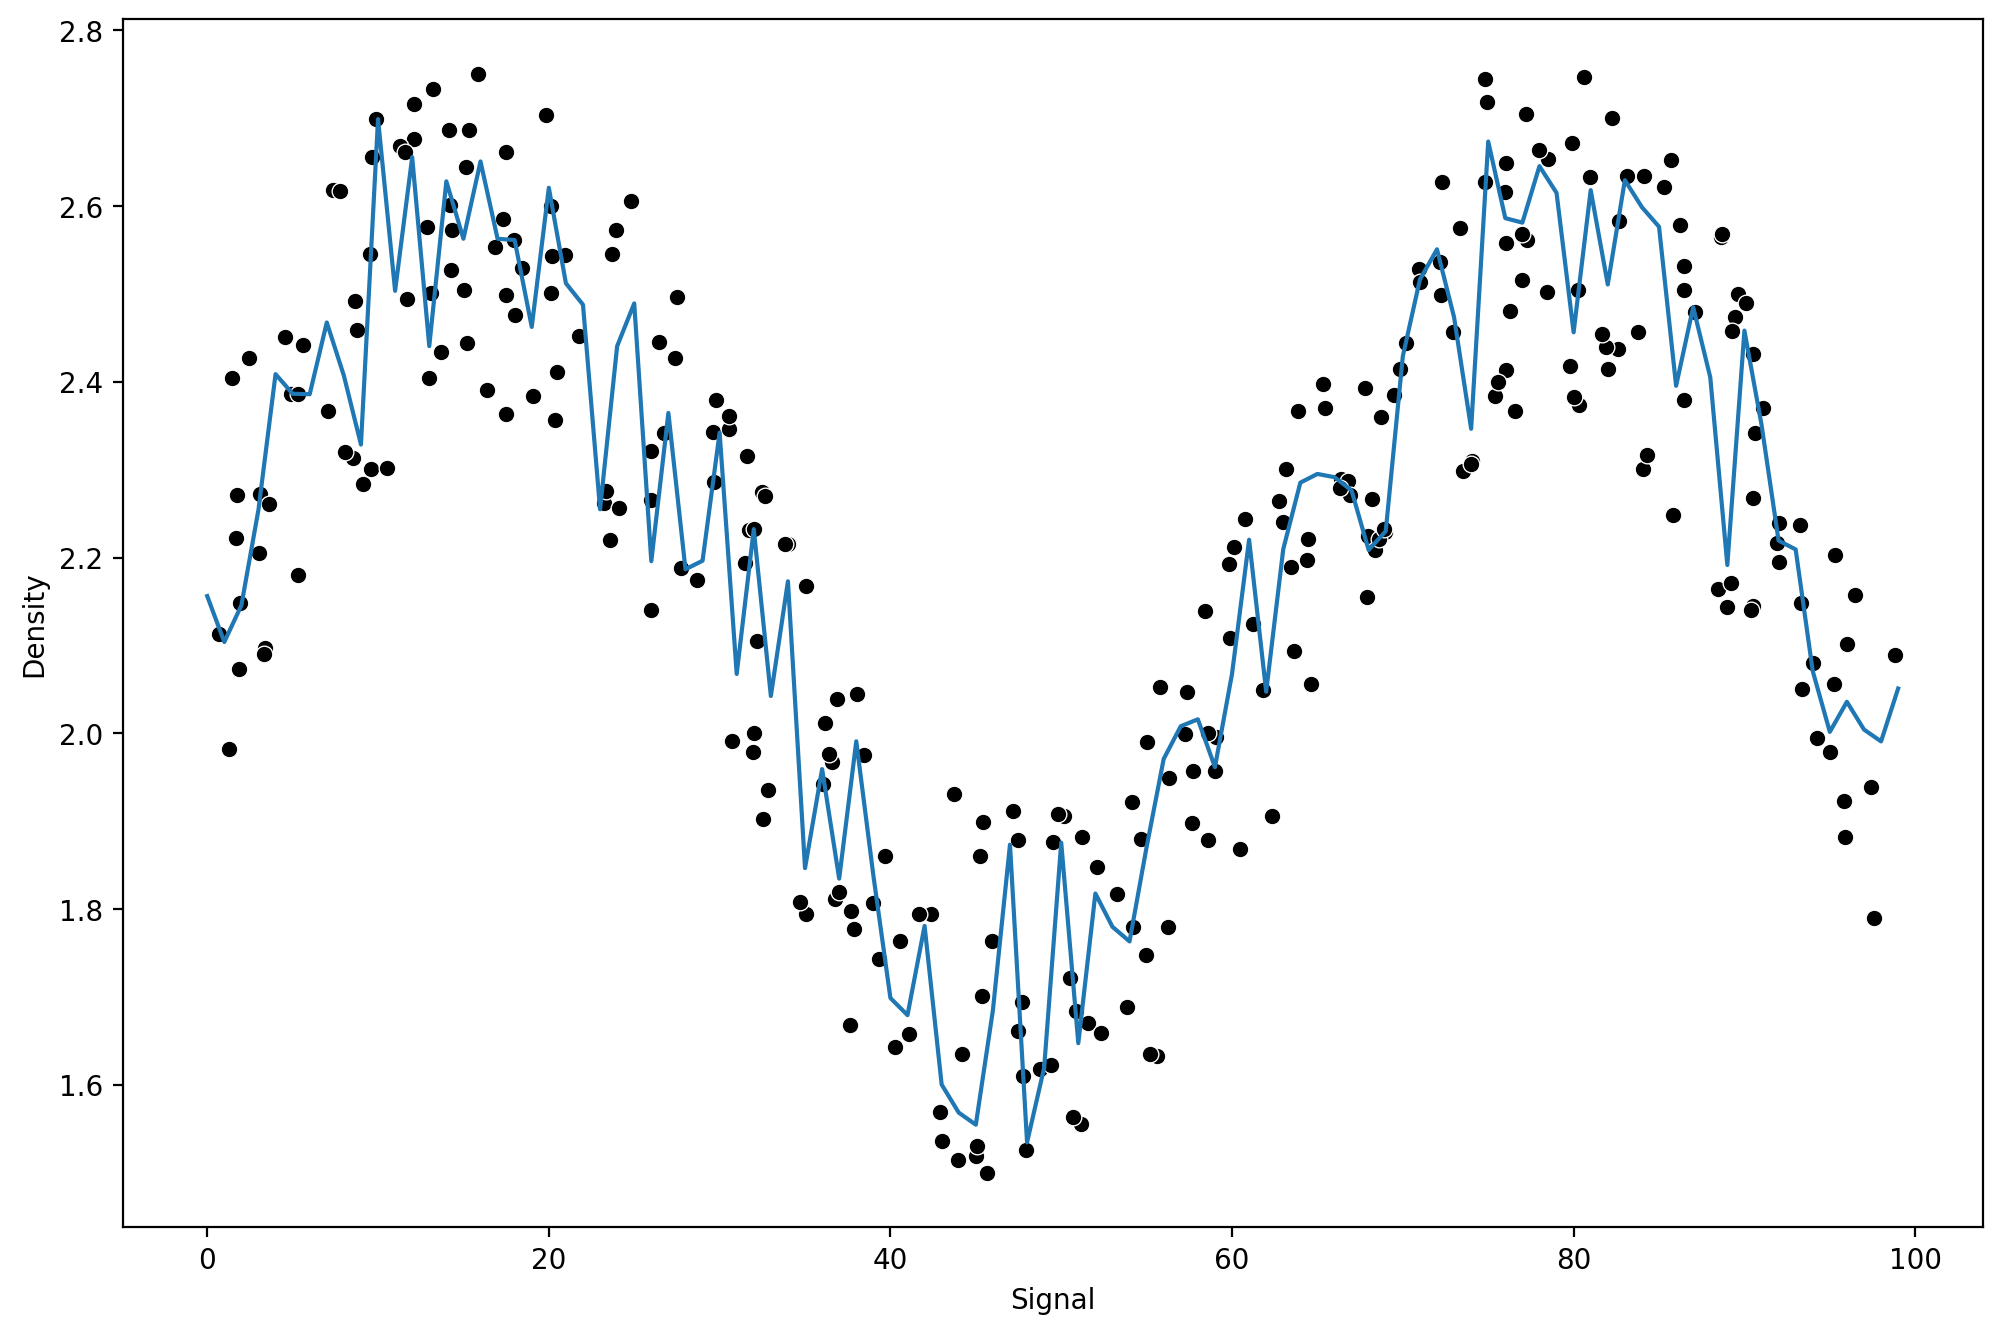

In [45]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

### Boosting Model (sneakpeak)

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


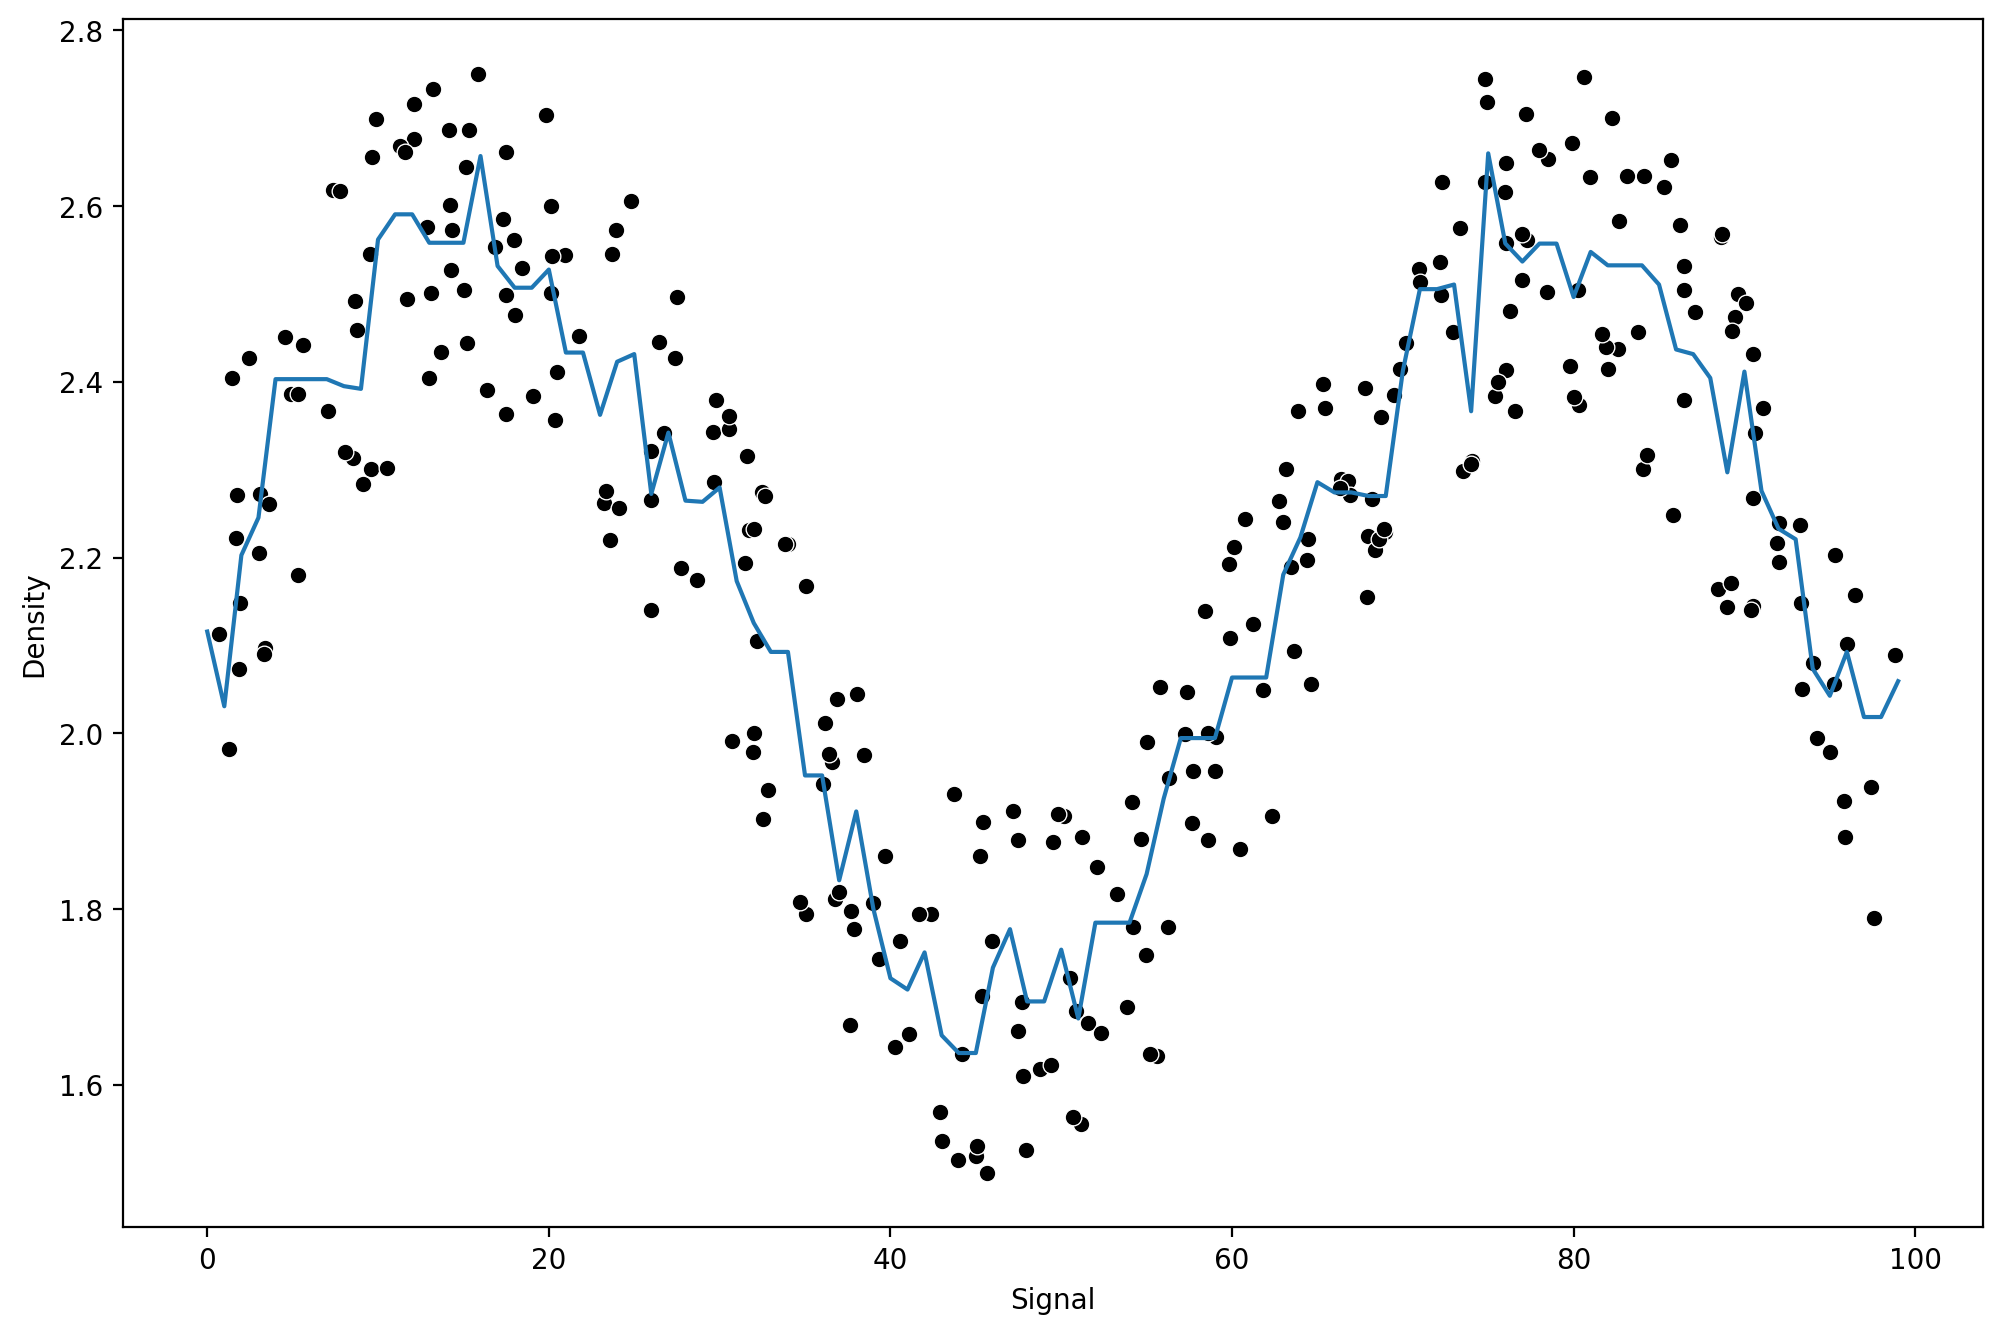

In [47]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE : 0.1210921141416575
RMSE : 0.14069767096110164


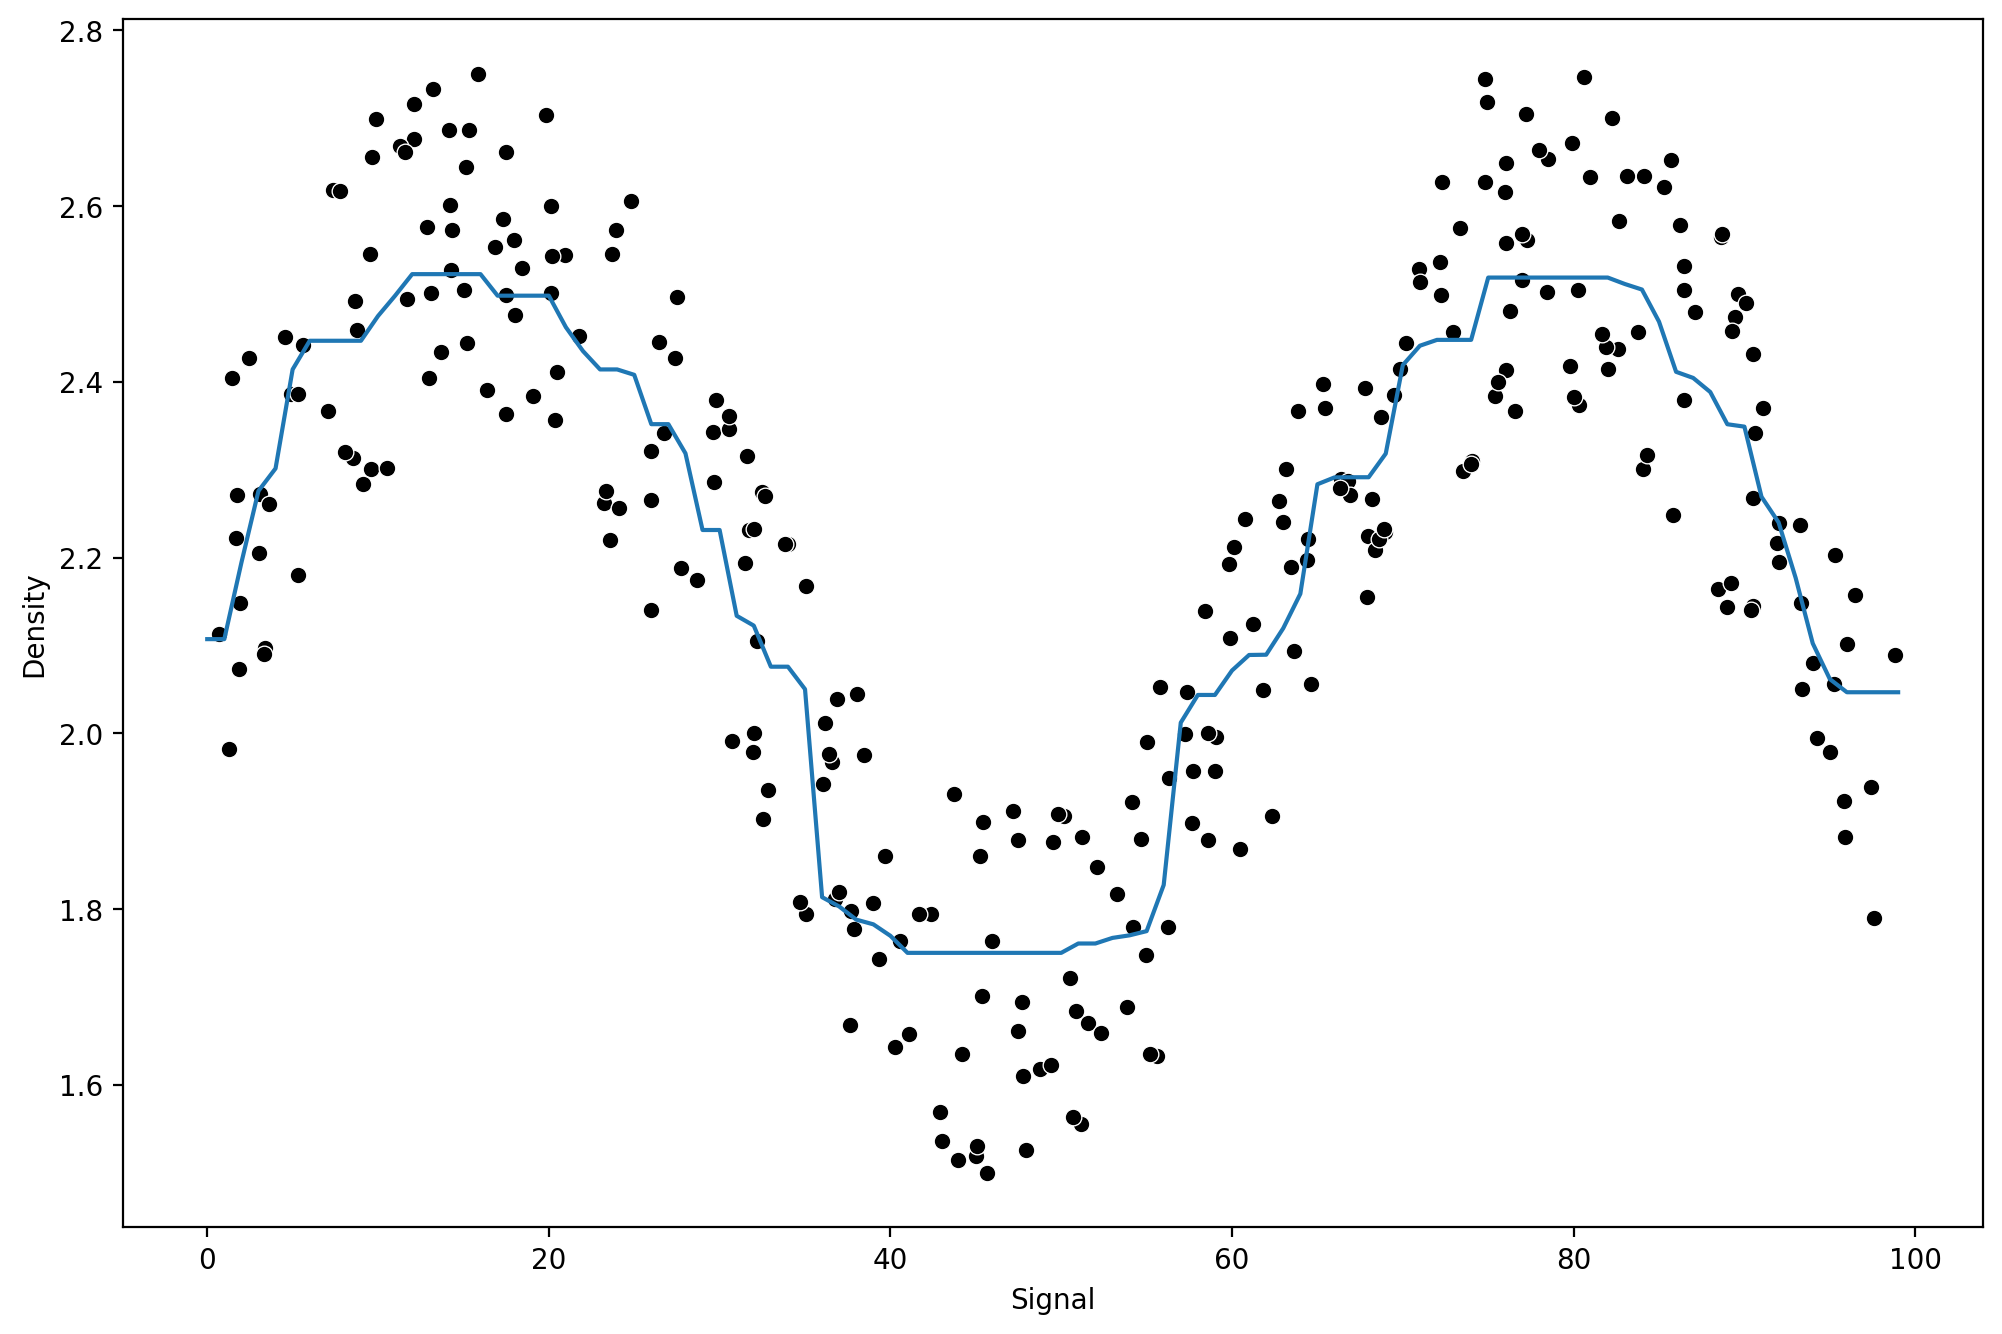

In [48]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)